In [80]:
import numpy as np  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd

In [81]:
voice_path = './data'

easy = 'voice_easy.wav'
hard = 'voice_hard.wav'

In [82]:
voice_easy, sr = librosa.load(os.path.join(voice_path, easy))
voice_hard, _ = librosa.load(os.path.join(voice_path, hard))
# 위 sample rate와 같은 주파수영역 사용하기 위해 "_" 사용

In [83]:
#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    plt.title("Waveform"); plt.show()

In [84]:
ipd.Audio(os.path.join(voice_path, easy))


/tmp/ipykernel_46152/3569226857.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)


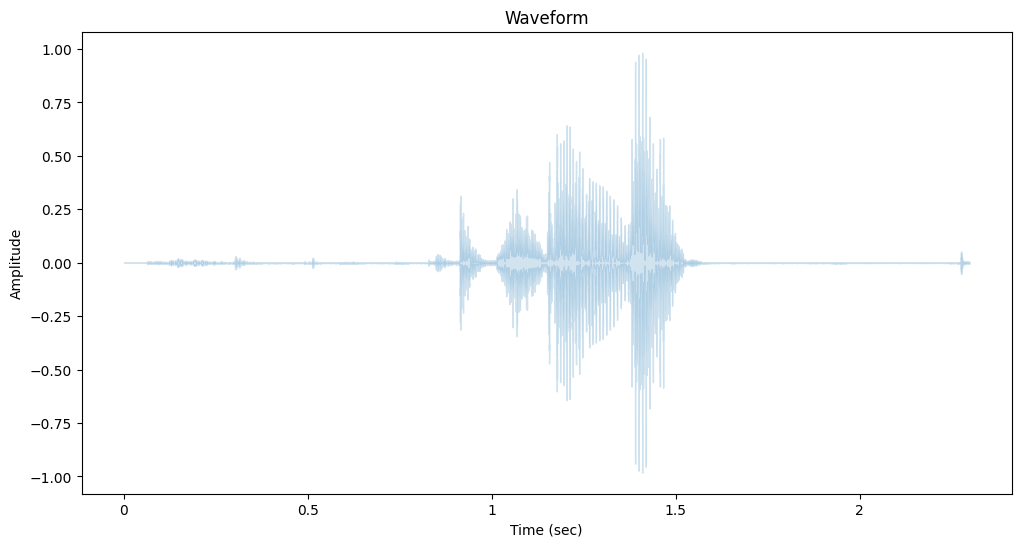

In [85]:
draw_wave(voice_easy, sr)

In [86]:
ipd.Audio(os.path.join(voice_path, hard))

/tmp/ipykernel_46152/3569226857.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)


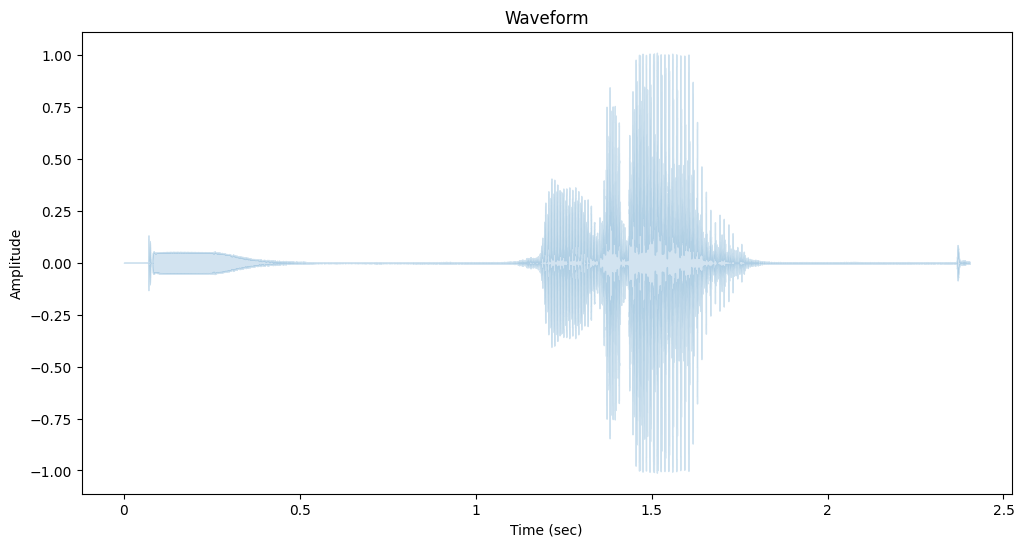

In [87]:
draw_wave(voice_hard, sr)

easy1, sr = librosa.load(os.path.join(voice_path, easy))
hard1, _ = librosa.load(os.path.join(voice_path, hard))

In [88]:
voice_easy.shape

(50688,)

In [89]:
voice_easy_ft = np.fft.fft(voice_easy)
voice_easy_ft.shape

(50688,)

In [90]:
voice_easy_ft[0] #복소수가 있음을 확인

(0.6709841275911298+0j)

In [91]:
magnitude_voice_easy = np.abs(voice_easy_ft) #절댓값 씌워서 복소수 제거

In [92]:
magnitude_voice_easy[0] #복소수 제거된 실제 magnitude

0.6709841275911298

In [93]:
# def plot_magnitude_spectrum(sample_sounds, title, sr):
#     ft = np.fft.fft(sample_sounds)
#     magnitude = np.abs(ft)
#     frequency = np.linspace(0, sr, len(magnitude))
    
#     # FFT변환한 결과로 나온 specturm은 대칭구조의 모습을 보인다.
#     # high frequency 부분 반절을 잘라내고 앞쪽 반절만 사용.
#     left_frequency = frequency[:int(len(frequency)/2)]
#     left_magnitude = magnitude[:int(len(magnitude)/2)]

#     plt.figure(figsize=(15, 5))
#     plt.plot(left_frequency, left_magnitude)
#     plt.title(title)
#     plt.xlabel('frequency (Hz)')
#     plt.ylabel('magnitude')
    
#     plt.show()

In [94]:
# plot_magnitude_spectrum(easy1, "voice_easy", sr)


In [95]:
# FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, title, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title(title)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    
    plt.show()

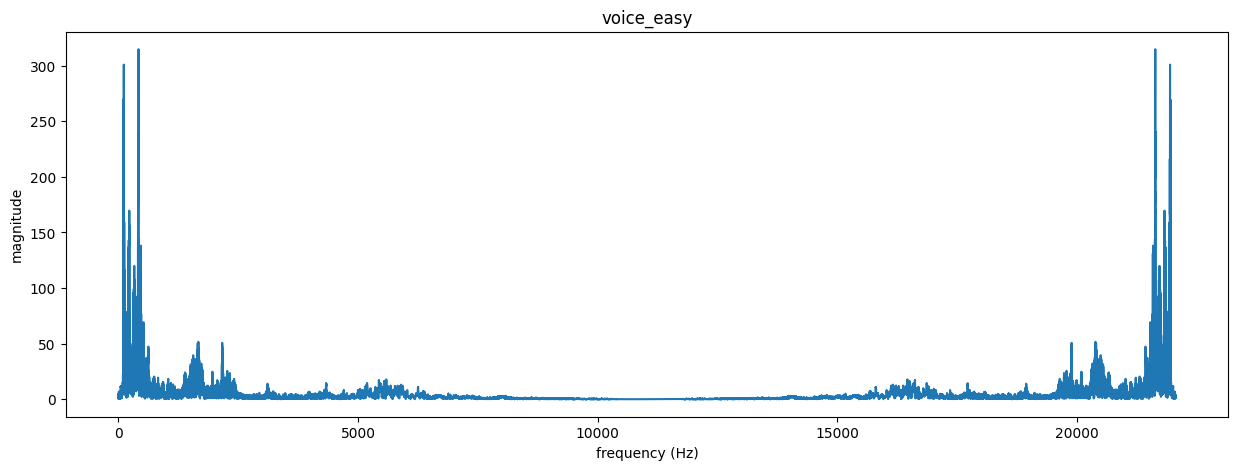

In [98]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 1)
# 22,050Hz가 default 

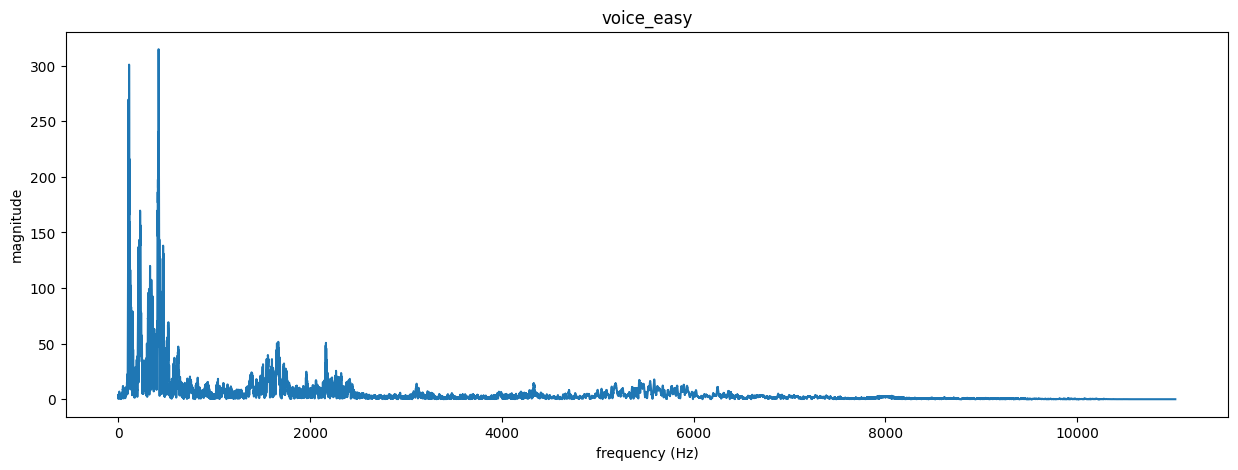

In [96]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.5)
# 0.5값을 줘서 대칭되는 것 중 전면부만 사용

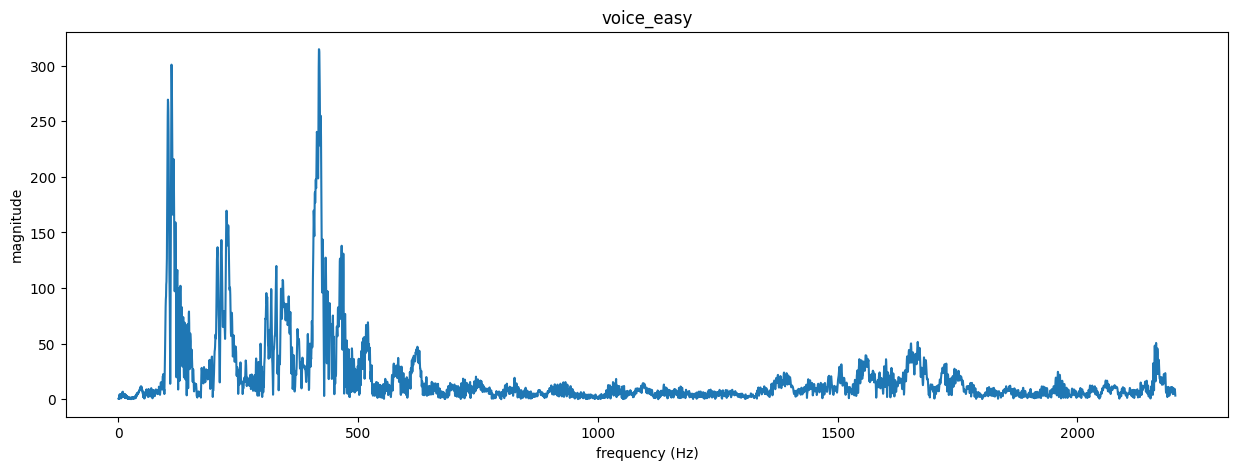

In [97]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.1)
#유효한 스펙트럼까지 슬라이싱